<a href="https://colab.research.google.com/github/teja12345678909876/dataanalyst/blob/main/03_12_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install opendatasets

In [3]:
import opendatasets as od


In [4]:
import pandas as pd

In [10]:
data = pd.read_csv('/content/PoliceKillingsUS (1).csv', encoding='latin-1')

In [11]:
data

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.0,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.0,M,NaN,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.0,M,B,Oshkosh,WI,False,attack,Car,True


In [18]:
import seaborn as sns

In [19]:
import matplotlib.pyplot as plt

           id       age
id   1.000000  0.001939
age  0.001939  1.000000

Highly Correlated Variables:
      id  age
id   1.0  NaN
age  NaN  1.0


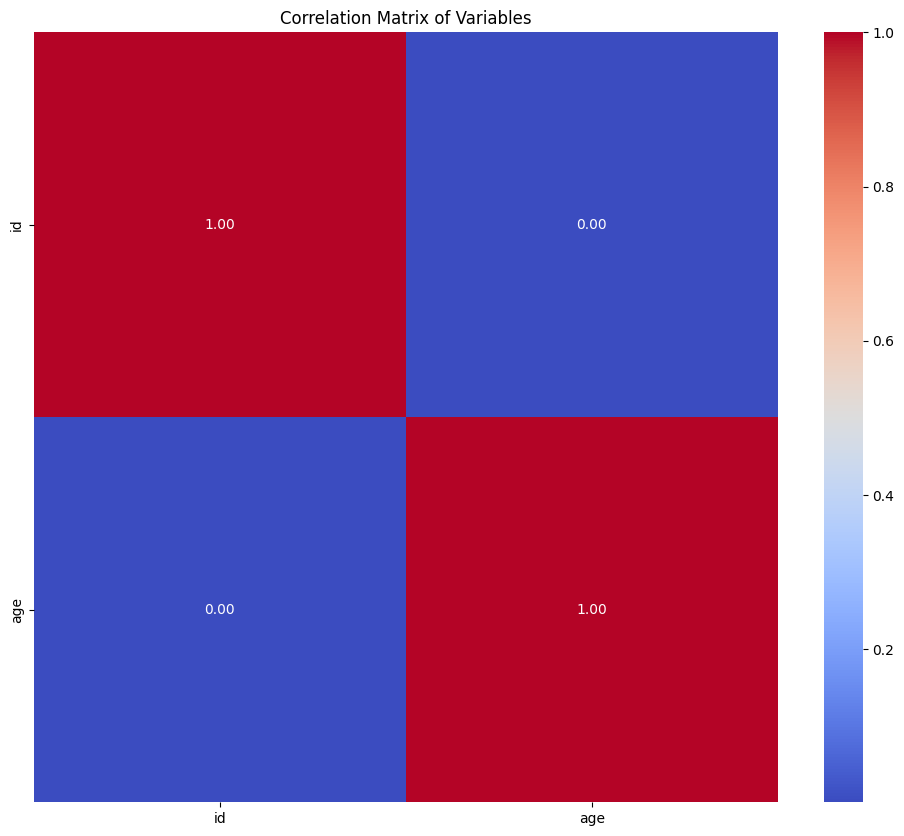

In [16]:


# Assuming your dataframe is named 'data' as in your previous code
# Replace 'data' with the actual name of your dataframe if different

# Select only numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Display the correlation matrix (optional)
print(correlation_matrix)


# Find highly correlated variables (example: correlation > 0.7)
high_correlation = correlation_matrix[abs(correlation_matrix) > 0.7]


# Print or visualize the highly correlated variables
print("\nHighly Correlated Variables:")
print(high_correlation)

# Visualize the correlation matrix (optional)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Variables")
plt.show()

<ipython-input-23-5b3be7d494df>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['manner_of_death_encoded'] = le.fit_transform(selected_data['manner_of_death'])


                              age  manner_of_death_encoded
age                      1.000000                 0.008699
manner_of_death_encoded  0.008699                 1.000000


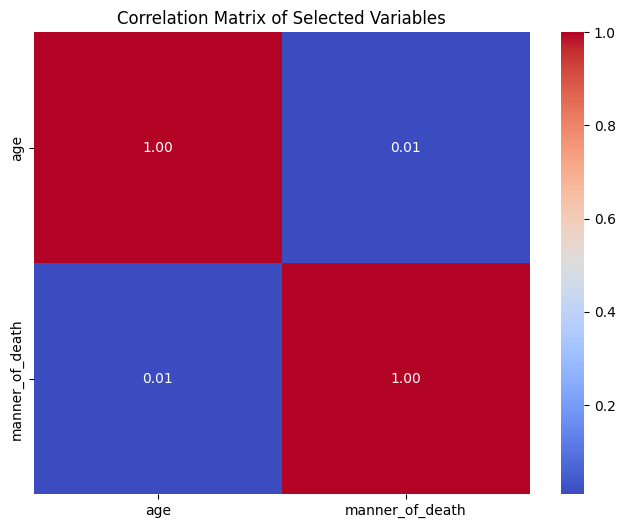

In [23]:

# Select the variables you want to analyze
variables = ['age', 'manner_of_death']

# Filter the dataframe to include only selected variables
selected_data = data[variables]

# Convert 'manner_of_death' to numerical representation using Label Encoding
# This is necessary for calculating correlation with a categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
selected_data['manner_of_death_encoded'] = le.fit_transform(selected_data['manner_of_death'])

# Now, calculate the correlation matrix using the encoded column and 'age'
correlation_matrix = selected_data[['age', 'manner_of_death_encoded']].corr()

# Display the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix, using original 'manner_of_death' for labels
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f",
            xticklabels=['age', 'manner_of_death'], # Using original labels for better readability
            yticklabels=['age', 'manner_of_death']) # Using original labels for better readability
plt.title("Correlation Matrix of Selected Variables")
plt.show()

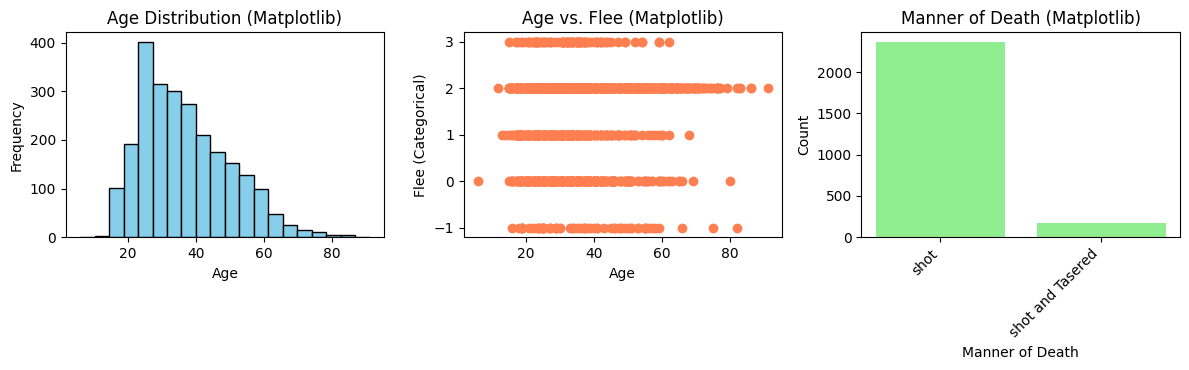

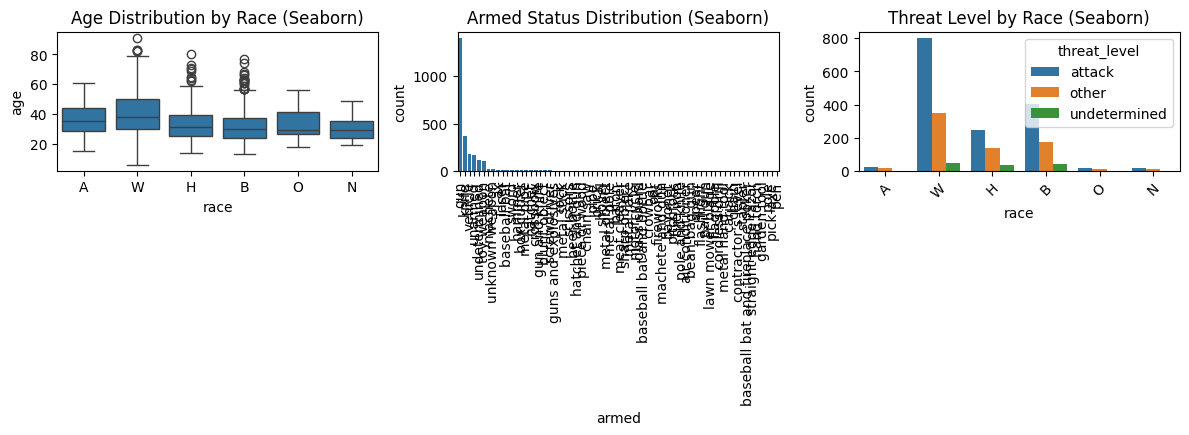

In [15]:



# --- Matplotlib Charts ---

plt.figure(figsize=(12, 6))

# Matplotlib Chart 1: Histogram of Age
plt.subplot(2, 3, 1)  # Create a subplot grid of 2 rows and 3 columns
plt.hist(data['age'].dropna(), bins=20, color='skyblue', edgecolor='black') #Handle potential NaN values
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution (Matplotlib)")

# Matplotlib Chart 2: Scatter Plot of Age vs. Flee
plt.subplot(2, 3, 2)
plt.scatter(data['age'], data['flee'].astype('category').cat.codes, color='coral') # Convert 'flee' to numerical representation for plotting
plt.xlabel('Age')
plt.ylabel('Flee (Categorical)')
plt.title('Age vs. Flee (Matplotlib)')


# Matplotlib Chart 3: Bar Chart of Manner of Death
manner_counts = data['manner_of_death'].value_counts()
plt.subplot(2, 3, 3)
plt.bar(manner_counts.index, manner_counts.values, color='lightgreen')
plt.xlabel('Manner of Death')
plt.ylabel('Count')
plt.title('Manner of Death (Matplotlib)')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


# --- Seaborn Charts ---


plt.figure(figsize=(12, 6))

# Seaborn Chart 1: Box Plot of Age by Race
plt.subplot(2, 3, 4)
sns.boxplot(x='race', y='age', data=data)
plt.title('Age Distribution by Race (Seaborn)')

# Seaborn Chart 2: Count Plot of Armed Status
plt.subplot(2, 3, 5)
sns.countplot(x='armed', data=data, order=data['armed'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Armed Status Distribution (Seaborn)')

# Seaborn Chart 3:  Relationship between Threat Level and Race
plt.subplot(2, 3, 6)
sns.countplot(x='race', hue='threat_level', data=data) # Using countplot with hue for categorical variable
plt.title('Threat Level by Race (Seaborn)')
plt.xticks(rotation=45)

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

1. correlation matrix shows a very weak correlation between the variables 'id' and 'age'.
2. The correlation coefficient is close to 0, indicating that there is no linear relationship between the two variables.


   **   charts**
3. Chart-1 Age Distribution (Matplotlib)
4. Chart-2 Age vs. Flee (Matplotlib)
5. Chart-3 Manner of Death (Matplotlib)
6. Chart-4 Age Distribution by Race (Seaborn)
7. Chart-5 Armed Status Distribution (Seaborn)
8. Chart-6 Threat Level by Race (Seaborn)
  
